In [2]:
import cv2 as cv
import numpy as np
import pandas as pd
show_fourmis=pd.read_csv('result/boite/location_dectection_diplay.csv',dtype=np.int32)

In [3]:
show_fourmis

,id,center_x,center_y,time,x,y,w,h
0,0,502,1045,21,490,1039,24,12
1,0,502,1045,22,490,1039,24,12
2,0,496,1043,23,489,1037,14,13
3,0,495,1043,24,488,1037,14,13
4,0,500,1043,25,488,1037,25,13
...,...,...,...,...,...,...,...,...
57522,147,1220,800,11856,1216,779,8,42
57523,150,968,787,11857,958,779,21,17
57524,150,968,788,11858,958,781,20,15
57525,151,710,268,11859,700,262,21,13


In [28]:
length={}
for i in range(151):
    
    df=show_fourmis[show_fourmis['id']==i]['time']
    if len(df)<5:
        continue
    length.update({i:df.max()-df.min()})

In [29]:
np.max(times)/25

72.56

In [30]:
times=[params for _,params in length.items()]
np.mean(times)/11860

0.04004515041070554

In [ ]:
np.mean(times)/25

18.99741935483871

In [31]:
np.min(times)/25

0.32

In [36]:
np.where(np.array(times)<5*25)[0].shape, np.where(np.array(times)>10*25)[0].shape

((9,), (109,))

(array([12., 33., 47., 13., 12.,  3.,  3.,  0.,  0.,  1.]),
 array([   8. ,  188.6,  369.2,  549.8,  730.4,  911. , 1091.6, 1272.2,
        1452.8, 1633.4, 1814. ]),
 <BarContainer object of 10 artists>)

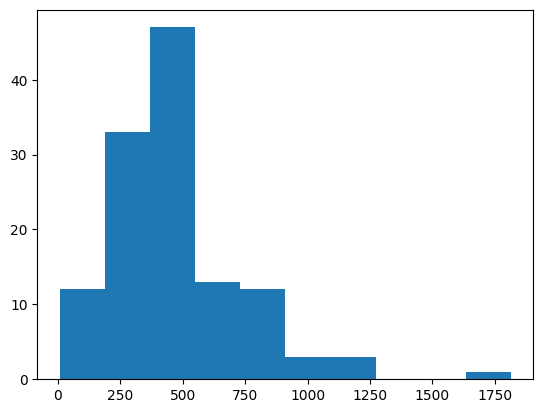

In [32]:
import matplotlib.pyplot as plt
counts, bins = np.histogram(times)
plt.hist(bins[:-1], bins, weights=counts)

In [16]:
fourmis_pos=pd.read_csv('result/boite/vert_location_dectection.csv',dtype=np.int32)

In [17]:
fourmis_pos['id'].max()

11066

In [12]:
fourmis_pos['time'].max()

398

In [13]:
length_pos={}
for i in range(fourmis_pos['id'].max()):
    df=fourmis_pos[fourmis_pos['id']==i]['time']
    if len(df)<5:
        continue
    length_pos.update({i:df.max()-df.min()})
len(length_pos)
times_pos=[params for _,params in length_pos.items()]

In [14]:
np.max(times_pos)/25,np.min(times_pos)/25,np.mean(times_pos)/25


(14.76, 0.04, 0.4916129032258065)

(array([5.731e+03, 1.464e+03, 3.200e+02, 9.500e+01, 1.100e+02, 5.900e+01,
        4.700e+01, 2.700e+01, 3.800e+01, 1.800e+01, 2.200e+01, 2.100e+01,
        1.400e+01, 1.500e+01, 7.000e+00, 1.100e+01, 1.200e+01, 1.500e+01,
        3.000e+00, 1.300e+01]),
 array([ 0.  ,  2.45,  4.9 ,  7.35,  9.8 , 12.25, 14.7 , 17.15, 19.6 ,
        22.05, 24.5 , 26.95, 29.4 , 31.85, 34.3 , 36.75, 39.2 , 41.65,
        44.1 , 46.55, 49.  ]),
 <BarContainer object of 20 artists>)

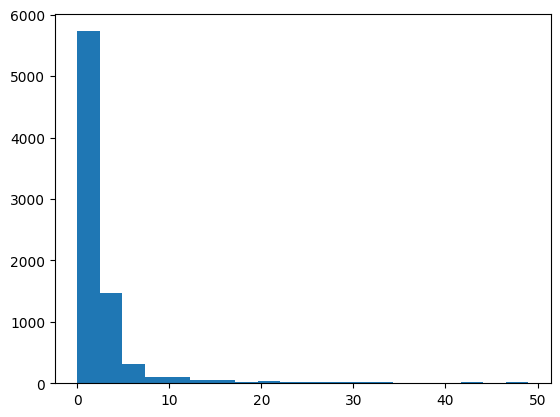

In [88]:
times_pos=np.array(times_pos)
counts_pos, bins_pos = np.histogram(times_pos[times_pos<50],bins=20)
plt.hist(bins_pos[:-1], bins_pos, weights=counts_pos)

(array([41., 24., 20., 10.,  9.,  2.,  4.,  0.,  2.,  0.,  3.,  4.,  2.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([ 51.  ,  71.75,  92.5 , 113.25, 134.  , 154.75, 175.5 , 196.25,
        217.  , 237.75, 258.5 , 279.25, 300.  , 320.75, 341.5 , 362.25,
        383.  , 403.75, 424.5 , 445.25, 466.  ]),
 <BarContainer object of 20 artists>)

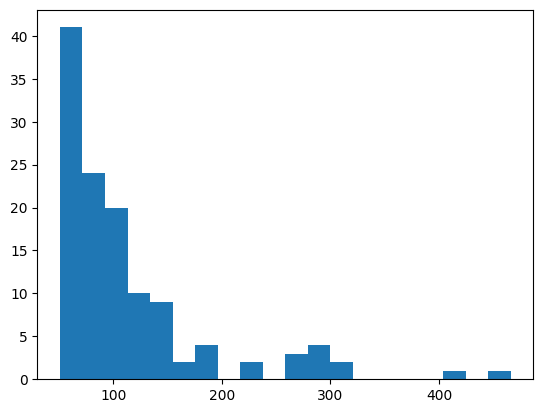

In [89]:
counts_pos, bins_pos = np.histogram(times_pos[times_pos>50],bins=20)
plt.hist(bins_pos[:-1], bins_pos, weights=counts_pos)

In [6]:
nid_100=np.load('result/nid/100.npy',allow_pickle=True)

In [39]:
len(nid_100)

100

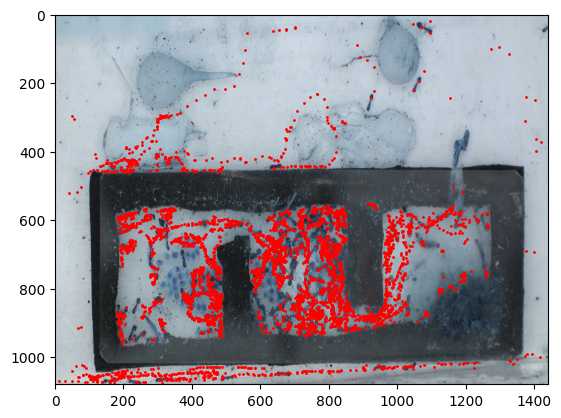

In [52]:
import matplotlib.pyplot as plt
for i in range(100):
    plt.scatter(nid_100[i][:,1],nid_100[i][:,0],color='r',s=1)
plt.imshow(cv.imread('extract/nid/100.jpg'))
plt.show()


In [5]:
X=np.load('recognition_img_fix/X_train.npy')
Y=np.load('recognition_img_fix/Y_train.npy')

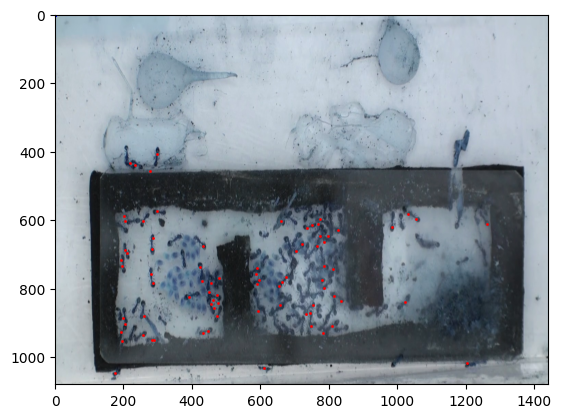

In [8]:
import matplotlib.pyplot as plt

plt.scatter(nid_100[0][:,1],nid_100[0][:,0],color='r',s=1)
plt.scatter(Y[0][:,1],Y[0][:,0],color='b',s=1)
plt.imshow(cv.imread('extract/nid/001.jpg'))
plt.show()

In [15]:
Y_x,Y_y=np.where(Y[0]==1)

In [31]:
X[0].shape

(1080, 1440, 3)

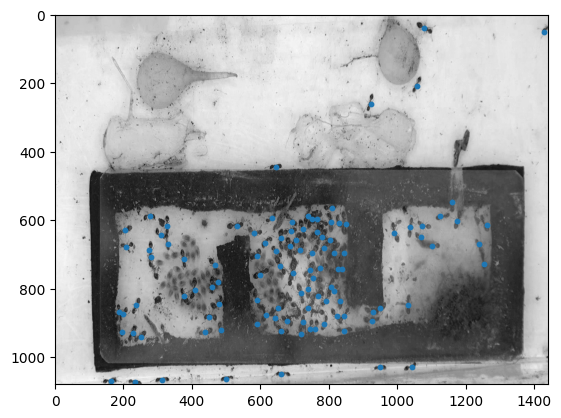

In [40]:
plt.imshow(X[0][:,:,0].astype(int),cmap='gray')
plt.scatter(Y_y,Y_x,s=10)

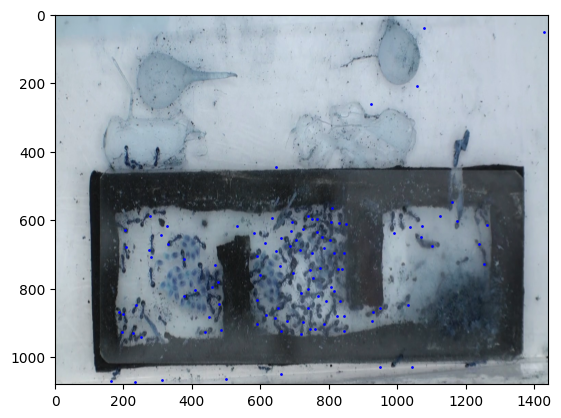

In [36]:
plt.scatter(Y_y,Y_x,color='b',s=1)
plt.imshow(cv.imread('extract/nid/001.jpg'))
plt.show()